In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

In [21]:
train_data = pd.read_csv("train_data.csv")
train_data.drop_duplicates(subset="tweetText",
                     keep=False, inplace=True)
train_features = train_data['tokens']
train_label = train_data['label']
test_data = pd.read_csv("test_data.csv")
test_data.drop_duplicates(subset="tweetText",
                     keep=False, inplace=True)
test_features = test_data['tokens']
test_label = test_data['label']

In [71]:
char_vectorizer = TfidfVectorizer(
    analyzer='char',
    max_features=10000,
)

In [72]:
train_char_features = char_vectorizer.fit_transform(train_features)
test_char_features = char_vectorizer.transform(test_features)
le = preprocessing.LabelEncoder()
train_label_encoded = le.fit_transform(train_label)
test_label_encoded = le.transform(test_label)

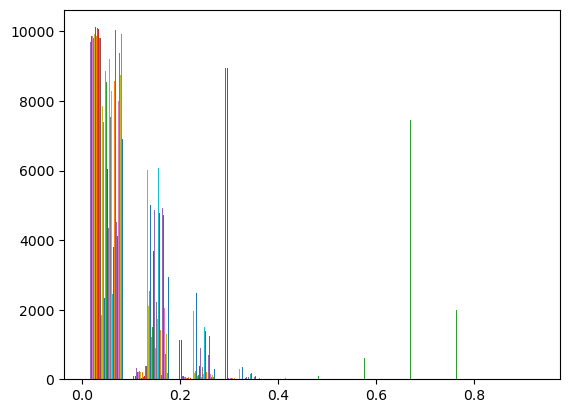

In [73]:
from matplotlib import pyplot as plt

plt.hist(train_char_features.todense())
plt.show()

In [74]:


from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
%time mnb.fit(train_char_features , train_label_encoded)
%time mnb.score(test_char_features, test_label_encoded)


CPU times: total: 0 ns
Wall time: 3.51 ms
CPU times: total: 0 ns
Wall time: 0 ns


0.7158505154639175